In [3]:
from scipy import stats
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('F:\\UW TACOMA\\Final Project Dr Lloyd\\cloud performance\\source codes\\forked\\SAAF_4min_5sec_weekend\\SAAF\\test\\all_containers_data.csv')
df.head()

,1_run_id,2_thread_id,containerID,contextSwitches,contextSwitchesDelta,cpuCores,cpuIdle,cpuIdleDelta,cpuIowait,cpuIowaitDelta,...,runtimeOverlap,startTime,totalMemory,userRuntime,uuid,value,vmID,vmcpusteal,vmcpustealDelta,vmuptime
0,0,1,2021/04/08/[$LATEST]384c1d5104a64e7ebf4a0c9962...,83221,122,2,1228510,46,29,0,...,0.47,1617887768914,1719232,415,7dee1b77-6f81-4fd4-8b88-3ecfeb62df95,uuid=c262a644-5d37-4623-87e4-e56f780e5be6 task...,UsjfLy,356,3,1617881621
1,0,0,2021/04/08/[$LATEST]eb9441b77fc84ac4b8f886d6f3...,58558,135,2,888194,46,19,0,...,0.94,1617880329421,1719232,398,95472ae9-3ac6-4159-ac4c-14e5337bba0d,uuid=5064590d-14be-43ce-9fec-161f62acd068 task...,QE7xyZ,292,0,1617875884
2,0,1,2021/04/08/[$LATEST]f1024a59054e4114b8fc7a7d5d...,44052,203,2,851640,53,16,0,...,1.30,1617916810161,1719232,450,c1a38230-bd27-401b-85e2-a20aa2534c97,uuid=768f8aa9-ad95-4497-9d33-08b34ae18fe3 task...,wqZdDV,171,0,1617912550
3,0,6,2021/04/08/[$LATEST]e95506a449744df49cb0d03cce...,56129,138,2,1218625,64,19,0,...,2.11,1617924490298,1719232,527,4dcf27bc-97fe-43e8-91bf-712475795f1a,uuid=e2108aa5-6c96-4bcd-a9b3-08da8a5de221 task...,aquv3Y,348,6,1617918394
4,0,0,2021/04/08/[$LATEST]ce92843df9f044a995b22b7039...,80834,135,2,2129015,53,20,0,...,0.62,1617894489548,1719232,458,6e0c2407-44fb-4a51-b21b-70bad965e0d9,uuid=02d91d1e-a9e5-49b0-a1ae-3f1173acb044 task...,1O2wcP,149,2,1617883841


In [5]:
df = df.drop(['value'], axis = 1)
df = df.drop(['payload'], axis = 1)
df.dtypes

1_run_id                    int64
2_thread_id                 int64
containerID                object
contextSwitches             int64
contextSwitchesDelta        int64
cpuCores                    int64
cpuIdle                     int64
cpuIdleDelta                int64
cpuIowait                   int64
cpuIowaitDelta              int64
cpuIrq                      int64
cpuIrqDelta                 int64
cpuKrn                      int64
cpuKrnDelta                 int64
cpuModel                    int64
cpuNice                     int64
cpuNiceDelta                int64
cpuSoftIrq                  int64
cpuSoftIrqDelta             int64
cpuType                    object
cpuUsr                      int64
cpuUsrDelta                 int64
endTime                     int64
frameworkRuntime            int64
frameworkRuntimeDeltas      int64
freeMemory                  int64
functionMemory              int64
functionName               object
functionRegion             object
latency       

In [6]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
df = df.apply(le.fit_transform)
df.head()

,1_run_id,2_thread_id,containerID,contextSwitches,contextSwitchesDelta,cpuCores,cpuIdle,cpuIdleDelta,cpuIowait,cpuIowaitDelta,...,runtime,runtimeOverlap,startTime,totalMemory,userRuntime,uuid,vmID,vmcpusteal,vmcpustealDelta,vmuptime
0,0,1,256,7831,64,0,5969,21,26,0,...,51,45,5241,0,51,623,685,354,3,486
1,0,0,1098,3725,77,0,3080,21,16,0,...,34,92,3738,0,34,719,580,290,0,365
2,0,1,1119,1533,145,0,2784,28,13,0,...,132,128,11132,0,86,941,1235,169,0,1053
3,0,6,1084,3334,80,0,5883,39,16,0,...,169,205,12691,0,163,369,800,346,6,1126
4,0,0,956,7542,77,0,13527,28,17,0,...,96,60,6606,0,94,556,36,147,2,537


In [7]:
from sklearn.preprocessing import OneHotEncoder
# 1. INSTANTIATE
enc = OneHotEncoder(handle_unknown='ignore')

# 2. FIT
enc.fit(df)

# 3. Transform
onehotlabels = enc.transform(df).toarray()
onehotlabels.shape

(14600, 130340)

In [8]:
df.head()

,1_run_id,2_thread_id,containerID,contextSwitches,contextSwitchesDelta,cpuCores,cpuIdle,cpuIdleDelta,cpuIowait,cpuIowaitDelta,...,runtime,runtimeOverlap,startTime,totalMemory,userRuntime,uuid,vmID,vmcpusteal,vmcpustealDelta,vmuptime
0,0,1,256,7831,64,0,5969,21,26,0,...,51,45,5241,0,51,623,685,354,3,486
1,0,0,1098,3725,77,0,3080,21,16,0,...,34,92,3738,0,34,719,580,290,0,365
2,0,1,1119,1533,145,0,2784,28,13,0,...,132,128,11132,0,86,941,1235,169,0,1053
3,0,6,1084,3334,80,0,5883,39,16,0,...,169,205,12691,0,163,369,800,346,6,1126
4,0,0,956,7542,77,0,13527,28,17,0,...,96,60,6606,0,94,556,36,147,2,537


In [56]:
features = df.columns
X = df[features]
X = X.drop(['runtime'], axis = 1)
#getting rid of those runtime which are analoge of these runtime,
X = X.drop(['userRuntime'], axis = 1)
X = X.drop(['frameworkRuntime'], axis = 1)
#strong relationship between userTime and total time
#cpu didn't do anything
X = X.drop(['cpuIdleDelta'], axis = 1)
#remove the cpu users
X = X.drop(['cpuUsr'], axis = 1)
X = X.drop(['cpuUsrDelta'], axis = 1)

#handling the LEVELS seperately 
#hanlding and get the heatmap only based on runtime !!!!!
#get the linear regression between the cpusteal delta and pagefault delta and get the R^2 --pearson corr
# cpusteal delta is not that high
# take the average of the metrics from each categories.
y = df['runtime']

In [73]:
features = ['1_run_id', '2_thread_id', 'cpuIdleDelta', 'contextSwitchesDelta', 'cpuIowaitDelta', 'cpuIrqDelta', 'cpuKrnDelta', 'cpuNiceDelta', 'cpuSoftIrqDelta','cpuUsrDelta', 'freeMemory', 'functionMemory', 'latency', 'majorPageFaultsDelta','newcontainer', 'pageFaultsDelta', 'roundTripTime', 'runtimeOverlap', 'startTime', 'totalMemory', 'vmcpustealDelta', 'vmuptime']
X = df[features]

In [74]:
X.head()

,1_run_id,2_thread_id,cpuIdleDelta,contextSwitchesDelta,cpuIowaitDelta,cpuIrqDelta,cpuKrnDelta,cpuNiceDelta,cpuSoftIrqDelta,cpuUsrDelta,...,latency,majorPageFaultsDelta,newcontainer,pageFaultsDelta,roundTripTime,runtimeOverlap,startTime,totalMemory,vmcpustealDelta,vmuptime
0,0,1,21,64,0,0,0,0,1,3,...,49,0,0,3,41,45,5241,0,3,486
1,0,0,21,77,0,0,1,0,0,3,...,212,0,0,3,193,92,3738,0,0,365
2,0,1,28,145,0,0,0,0,0,8,...,582,0,0,85,738,128,11132,0,0,1053
3,0,6,39,80,0,0,0,0,0,12,...,811,0,0,324,1636,205,12691,0,6,1126
4,0,0,28,77,0,0,0,0,0,8,...,275,0,0,158,284,60,6606,0,2,537


In [75]:
y.head()

0     51
1     34
2    132
3    169
4     96
Name: runtime, dtype: int64

In [76]:
#from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [77]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 0)
rf.fit(X_train, y_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_test, y_test)))


R^2 Training Score: 0.99 
OOB Score: 0.95 
R^2 Validation Score: 0.95


In [78]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [79]:
importances = rf.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
print(importances)

[0.00000000e+00 3.64348740e-03 7.18837865e-01 1.16147006e-02
 2.04657056e-05 0.00000000e+00 1.97672268e-02 0.00000000e+00
 6.26379295e-03 9.83787158e-02 8.19216031e-03 0.00000000e+00
 3.06294579e-03 3.83303560e-05 3.66958257e-04 3.01581699e-02
 3.66744237e-03 4.39716378e-03 2.97677904e-03 0.00000000e+00
 8.55654355e-02 3.04836086e-03]


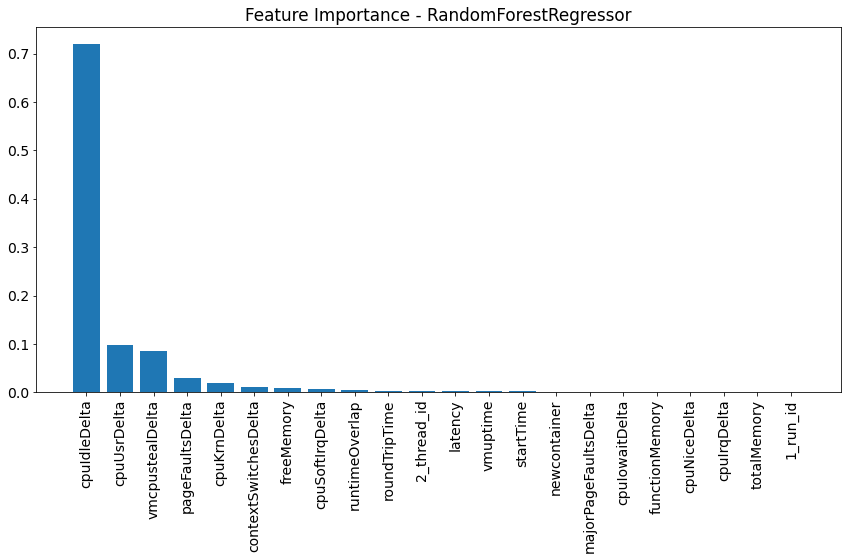

In [80]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance - RandomForestRegressor')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

R^2 Training Score: 0.97 
OOB Score: 0.78 
R^2 Validation Score: 0.76


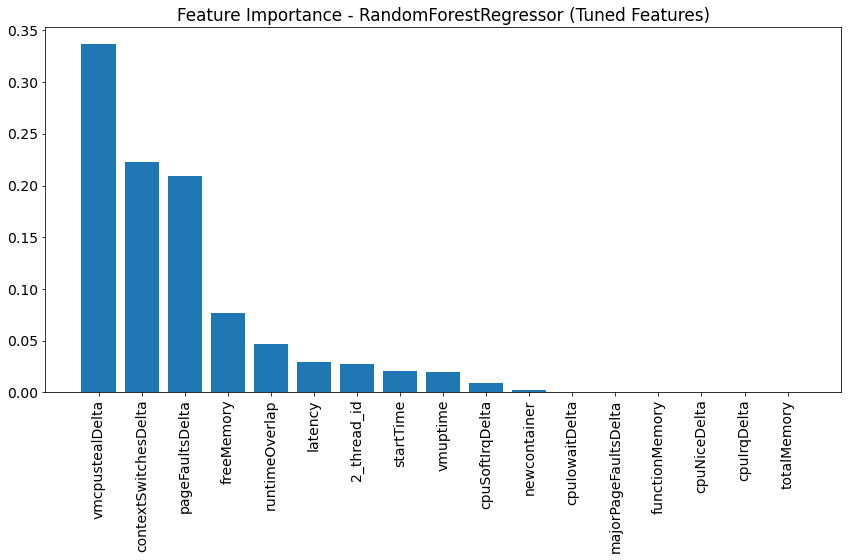

In [90]:

features = ['2_thread_id','contextSwitchesDelta', 'cpuIowaitDelta', 'cpuIrqDelta', 'cpuNiceDelta', 'cpuSoftIrqDelta', 'freeMemory', 'functionMemory', 'latency', 'majorPageFaultsDelta','newcontainer', 'pageFaultsDelta', 'runtimeOverlap', 'startTime', 'totalMemory', 'vmcpustealDelta', 'vmuptime']
#roundTripTime time is a misleading field since it can directly impact the runtime but due to the delay of the etwork which introduce a noise so removing that
X = df[features]
#-----------
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
#----------------
rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 0)
rf.fit(X_train, y_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_test, y_test)))
#---------
importances = rf.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

plt.title('Feature Importance - RandomForestRegressor (Tuned Features)')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#------------tuned features set

features = ['2_thread_id','contextSwitchesDelta', 'cpuIowaitDelta', 'cpuIrqDelta', 'cpuNiceDelta', 'cpuSoftIrqDelta', 'freeMemory', 'functionMemory', 'latency', 'majorPageFaultsDelta','newcontainer', 'pageFaultsDelta', 'runtimeOverlap', 'startTime', 'totalMemory', 'vmcpustealDelta', 'vmuptime']
#roundTripTime time is a misleading field since it can directly impact the runtime but due to the delay of the etwork which introduce a noise so removing that
X = df[features]
#-----------
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
#----------------- end of init

tuned_param={'max_depth':4,'n_estimators':15}
model=GridSearchCV(RandomForestClassifier(n_jobs=-1),param_grid=tuned_param,return_train_score=True)
model.fit(X_train, y_train)
print("Best hyper paramters:",model.best_params_)
print("Best accuracy value: ",model.best_score_ )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Best hyper paramters: {'max_depth': 4, 'n_estimators': 15}
Best accuracy value:  0.03196347031963471


In [41]:
#import cPickle
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import FunctionTransformer

In [ ]:
#generate the HEATMAP using the reduced 22 features ONLY

In [1]:
# or maybe should use KERAS
preprocess = FunctionTransformer(np.log1p)
gbm = GradientBoostingRegressor(learning_rate = 0.1,
                                random_state = 1234)
pipe = Pipeline([("preprocess", preprocess), ("gbm", gbm)])
gbm_cv = GridSearchCV(pipe,
                      dict(gbm__n_estimators = [50, 100, 150, 200],
                           gbm__max_depth = [5, 6, 7, 8, 9, 10]),
                      cv = 5,
                      scoring = make_scorer(mean_squared_error),
                      verbose = 100)
gbm_cv.fit(X_train, y_train)

NameError: name 'FunctionTransformer' is not defined

In [ ]:
score = gbm_cv.predict(X_test)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#reading file with the LABEL per container(LEVEL)
df = pd.read_csv('F:\\UW TACOMA\\Final Project Dr Lloyd\\cloud performance\\source codes\\forked\\SAAF_4min_5sec_weekend\\SAAF\\test\\all_container_data_added_label.csv')
#TUNED set of columns
features = ['2_thread_id','contextSwitchesDelta', 'cpuIowaitDelta', 'cpuIrqDelta', 'cpuNiceDelta', 'cpuSoftIrqDelta', 'freeMemory', 'functionMemory', 'latency', 'majorPageFaultsDelta','newcontainer', 'pageFaultsDelta', 'runtimeOverlap', 'startTime', 'totalMemory', 'vmcpustealDelta', 'vmuptime']
#roundTripTime time is a misleading field since it can directly impact the runtime but due to the delay of the etwork which introduce a noise so removing that
X = df[features]
y = df['container_label']
#-----------
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
#----------------- end of init
clf=RandomForestClassifier(max_depth=4,n_estimators=20)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5224657534246575


In [19]:
#using another attempt data for prediction also
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#reading file with the LABEL per container(LEVEL)
df = pd.read_csv('F:\\UW TACOMA\\Final Project Dr Lloyd\\cloud performance\\source codes\\forked\\SAAF_4min_5sec_weekend\\SAAF\\test\\all_container_data_added_label.csv')
#TUNED set of columns
features = ['2_thread_id','contextSwitchesDelta', 'cpuIowaitDelta', 'cpuIrqDelta', 'cpuNiceDelta', 'cpuSoftIrqDelta', 'freeMemory', 'functionMemory', 'latency', 'majorPageFaultsDelta','newcontainer', 'pageFaultsDelta', 'runtimeOverlap', 'startTime', 'totalMemory', 'vmcpustealDelta', 'vmuptime']
#Train on all data and then predict another attempt
X_train = df[features]
y_train = df['container_label']
#----------- prediction dataset
df_test = pd.read_csv('F:\\UW TACOMA\\Final Project Dr Lloyd\\cloud performance\\source codes\\forked\\SAAF_4min_5sec_weekend\\SAAF\\test\\predict_data_added_label.csv')
features = ['cpuIowaitDelta', 'cpuIrqDelta', 'cpuNiceDelta', 'cpuSoftIrqDelta', 'freeMemory', 'functionMemory', 'latency', 'majorPageFaultsDelta','newcontainer', 'pageFaultsDelta', 'runtimeOverlap', 'startTime', 'totalMemory', 'vmcpustealDelta', 'vmuptime']
X_test = df_test[features]
y_test = df_test['container_label']

#----------------- end of init
tuned_param={'max_depth':range(1,15),'n_estimators':range(1,20)}
model=GridSearchCV(RandomForestClassifier(n_jobs=-1),param_grid=tuned_param,return_train_score=True)
model.fit(X_train, y_train)
print("Best hyper paramters:",model.best_params_)
print("Best accuracy value: ",model.best_score_ )

Best hyper paramters: {'max_depth': 12, 'n_estimators': 19}
Best accuracy value:  0.5736986301369862


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#reading file with the LABEL per container(LEVEL)
df = pd.read_csv('F:\\UW TACOMA\\Final Project Dr Lloyd\\cloud performance\\source codes\\forked\\SAAF_4min_5sec_weekend\\SAAF\\test\\all_container_data_added_label.csv')
#TUNED set of columns
features = ['cpuIowaitDelta', 'cpuIrqDelta', 'cpuNiceDelta', 'cpuSoftIrqDelta', 'freeMemory', 'functionMemory', 'latency', 'majorPageFaultsDelta','newcontainer', 'pageFaultsDelta', 'runtimeOverlap', 'startTime', 'totalMemory', 'vmcpustealDelta', 'vmuptime']
#Train on all data and then predict another attempt
X_train = df[features]
y_train = df['container_label']
#----------- prediction dataset
df_test = pd.read_csv('F:\\UW TACOMA\\Final Project Dr Lloyd\\cloud performance\\source codes\\forked\\SAAF_4min_5sec_weekend\\SAAF\\test\\predict_data_added_label.csv')
features = ['cpuIowaitDelta', 'cpuIrqDelta', 'cpuNiceDelta', 'cpuSoftIrqDelta', 'freeMemory', 'functionMemory', 'latency', 'majorPageFaultsDelta','newcontainer', 'pageFaultsDelta', 'runtimeOverlap', 'startTime', 'totalMemory', 'vmcpustealDelta', 'vmuptime']
X_test = df_test[features]
y_test = df_test['container_label']

#----------------- end of init

clf=RandomForestClassifier(max_depth=20,n_estimators=30)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.52


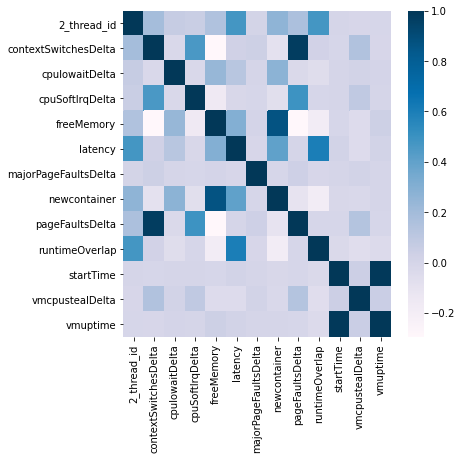

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

features = ['2_thread_id','contextSwitchesDelta', 'cpuIowaitDelta', 'cpuSoftIrqDelta', 'freeMemory', 'latency', 'majorPageFaultsDelta','newcontainer', 'pageFaultsDelta', 'runtimeOverlap', 'startTime', 'vmcpustealDelta', 'vmuptime']
#Train on all data and then predict another attempt
tuned_df = df[features]

#Using Pearson Correlation
plt.figure(figsize=(6,6))
cor = tuned_df.corr()
#default
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#adjusted
sns.heatmap(cor, annot=False, cmap="PuBu")
plt.show()